There are 3 types of classification we deal in machine learning.

Binary classification - this or that ( 0 or 1)

Multiclass clasfication - (0, or 1 or 2 ...)

Multilable classification - Multiple label options per sample. ex: (1,2,3) for a particular case.

for binary classification, the o/p activation function is sigmoid and loss function is binary cross entropy.

for multiclass classification, the o/p activation function is softmax and loss function is categorical cross entropy.

Classificaion Inputs and Outputs:

for an image classification example:
[batch_size, width, height, colour_channels]

shape = [None, 224, 224, 3] or

shape = [32, 224, 224, 3]

32 is very common batch size. Often time when you are training a machine learning algrothim, depending on how many data we are working with and depending on the size of the computing chip that we are working with, it may only have enough memory to look at 32 samples at one time.

ex: Say we are working with 10,000 images on an image classification problem, our ml algorithm may only look at 32 images at a time so that it doesn't run out of memory.

If we are working on 3 shapes the output shape will be [0.97, 0.00, 0.03] The above number is just an arbitary number represting example.

for text classification: The input shape will contain batch size and number of words in a string.
The o/p shape will be depending on problem same as earlier depending on the no. of classification our problem is looking for.

In [172]:
#importing required libraries

import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [173]:
#creating data

from sklearn.datasets import make_circles

In [174]:
n_samples = 1000
X, y = make_circles(n_samples, noise = 0.03, random_state = 42)

In [175]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [176]:
X.shape

(1000, 2)

In [177]:
#see the first 10 lables
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [178]:
#make data frame of features and labels

circles = pd.DataFrame({"X0": X[:,0], "X1": X[:,1], "label":y})

In [179]:
circles.head()

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


In [180]:
#check out the different labels
circles.label.value_counts()

1    500
0    500
Name: label, dtype: int64

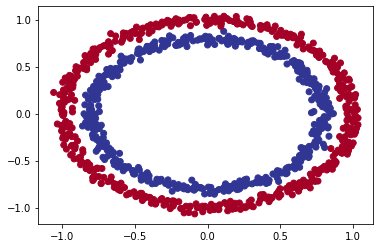

In [181]:
#visualize our circle.

plt.scatter(X[:,0], X[:,1], c = y, cmap = plt.cm.RdYlBu)

In [182]:
#Building a nood very good classification model

tf.random.set_seed(42)
model_1 = tf.keras.Sequential([tf.keras.layers.Dense(1)])

In [183]:
#compiling the model

model_1.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["accuracy"])

In [184]:
#fit the model.

model_1.fit(X, y, epochs = 5)

Epoch 1/5
32/32 [==============================] - 0s 1ms/step - loss: 2.8544 - accuracy: 0.4600
Epoch 2/5
32/32 [==============================] - 0s 1ms/step - loss: 0.7131 - accuracy: 0.5430
Epoch 3/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6973 - accuracy: 0.5090
Epoch 4/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6950 - accuracy: 0.5010
Epoch 5/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6942 - accuracy: 0.4830


In [185]:
#evaluate the model.

model_1.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6935 - accuracy: 0.5090


[0.6934750080108643, 0.5090000033378601]

In [186]:
#lets improve our model by adding an extra layer

tf.random.set_seed(42)

model_2 = tf.keras. Sequential([tf.keras.layers.Dense(1),
                                tf.keras.layers.Dense(1)])

In [187]:
#compile the model.

model_2.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["accuracy"])

In [188]:
#fit the model.

model_2.fit(X, y, epochs = 100, verbose = 0)

In [189]:
#evaluate the model.

model_2.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6933 - accuracy: 0.5000


[0.6933314800262451, 0.5]

Common ways to improve our model:

Adding layers.

Increasing the number of hidden units.

Changing the activation function.

Changing the optimizer

Changing the learning rate.

fitting on more data.

fiting for longer.


All the above parameters are changeable , hence they are called hyper parameters.

In [190]:
#create model_3 with extra number of hideen layers and increased in number of neurons, chnaging the optimizer to Adam.

tf.random.set_seed(42)

model_3 = tf.keras.Sequential([tf.keras.layers.Dense(100),
                               tf.keras.layers.Dense(10),
                               tf.keras.layers.Dense(1)])

In [191]:
#compile the model.

model_3.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

In [192]:
#fit the model.

model_3.fit(X, y, epochs =100, verbose = 0)

In [194]:
#evaluate the model.

model_3.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6980 - accuracy: 0.5080


[0.6980254650115967, 0.5080000162124634]

As we can see our model is not improving, we should look into how our model is classifiying the data. To look into this we should make a decission boundary plot.

In [195]:
#making a decission boundary plot.

def plot_decision_boundary(model, X, y,):
    #Creating a mesh grid.
    x_min, x_max = X[:,0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:,1].min() - 0.1, X[:, 1].max() + 0.1

    xx, yy = np.meshgrid(np.linspace(x_min,x_max,100),
                        np.linspace(y_min,y_max,100))
    
    #Creating x values. (we are going to make a prediction on these values)

    x_in = np.c_[xx.ravel(), yy.ravel()]

    #make prediction using the trained model.

    y_pred = model.predict(x_in)
    y_pred

    #check for multillcass

    if len(y_pred[0]) > 1:
        print("doing multiclass classification")

        #we have to reshape our predictions to get them ready for plotting

        y_pred = np.argmax(y_pred, axis = 1).reshape(xx.shape)

    else:
        print("doing binary classification")
        y_pred = np.round(y_pred).reshape(xx.shape)
    
    #plot decission boundary

    plt.contourf(xx, yy, y_pred, cmap = plt.cm.RdYlBu, alpha = 0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

doing binary classification


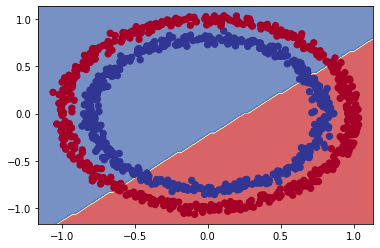

In [196]:
plot_decision_boundary(model_3, X, y)

From above plot we can see that our model is trained as regression model as our model is trying to draw a strainght line through out the data. Hence it is not a claasification model.

This model might work for regression problem. Lets try it.

In [197]:
tf.random.set_seed(42)

#create some regression data.

X_regression = tf.range(0,1000,5)
y_regression = tf.range(100,1100,5) #y = X + 100

In [198]:
#split our regression data into training and test set.

X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

In [199]:
X_reg_train.shape

TensorShape([150])

In [200]:
#fit our model to regression data.

model_3.fit(X_reg_train, y_reg_train, epochs = 100, verbose = 0)

ValueError: ignored

We compiled our model for binary classification but we are working for on a regression proble. Lets's change the model to suit our data.

In [201]:
#set random seed.

tf.random.set_seed(42)

#create the model.

model_3 = tf.keras.Sequential([tf.keras.layers.Input(shape=(1,))
                                ,tf.keras.layers.Dense(100),
                               tf.keras.layers.Dense(10),
                               tf.keras.layers.Dense(1)])
                               #(None, 1) here None represents the scalar inputs. 1 represents to 1 dimension i/p vectors.
                               #A more specific example: if the batch-size during model optimization/training is 32, 
                               #then None will take the value 32 and your model's input will be of size (32,1)
                               

In [202]:
#compile the model.

model_3.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["mae"])

In [203]:
#fit the model.

model_3.fit(tf.expand_dims(X_reg_train, axis = -1), y_reg_train, epochs = 100,verbose = 0)

In [204]:
#make predictions.

y_reg_preds = model_3.predict(X_reg_test)

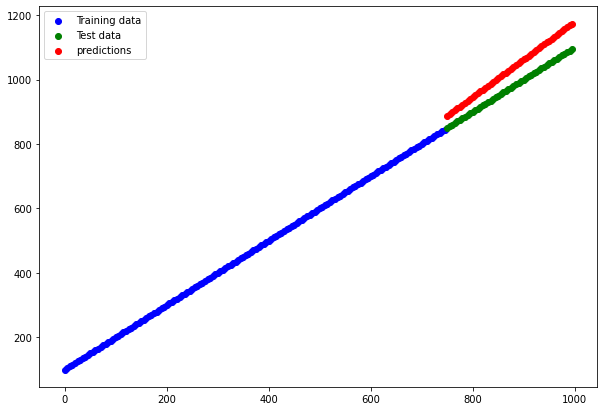

In [205]:
#plot model prediction using our regression data.

plt.figure(figsize = (10, 7))
plt.scatter(X_reg_train, y_reg_train, c = 'b', label = "Training data")
plt.scatter(X_reg_test, y_reg_test, c = "g", label = "Test data")
plt.scatter(X_reg_test, y_reg_preds, c ='r', label = 'predictions')
plt.legend()

From above visualization we can see that our model is performing well for linear predictions. Lets introduce non linearity by using activation function parameter while creating model.

In [206]:
#set the random seed.

tf.random.set_seed(42)

In [207]:
#create the model.

model_4 = tf.keras.Sequential([tf.keras.layers.Dense(1,
                                                     activation = tf.keras.activations.linear)])

In [208]:
#compile the model.

model_4.compile(loss = ["BinaryCrossentropy"],
                optimizer = tf.keras.optimizers.Adam(lr = 0.001),
                metrics = ["accuracy"])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [209]:
#fit the model

history = model_4.fit(X, y, epochs = 100)

Epoch 1/100
32/32 [==============================] - 0s 1ms/step - loss: 4.2979 - accuracy: 0.4670
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 4.2317 - accuracy: 0.4400
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1610 - accuracy: 0.4310
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1183 - accuracy: 0.4270
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 4.0784 - accuracy: 0.4240
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 3.9604 - accuracy: 0.4170
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 3.8936 - accuracy: 0.4110
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 3.7818 - accuracy: 0.4140
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 3.7564 - accuracy: 0.4140
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 3.7547 - accuracy: 0.4150
Epoch 11/

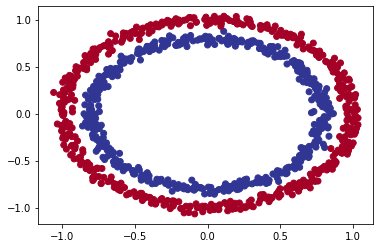

In [210]:
#check our data

plt.scatter(X[:, 0], X[:, 1], c = y, cmap = plt.cm.RdYlBu)

doing binary classification


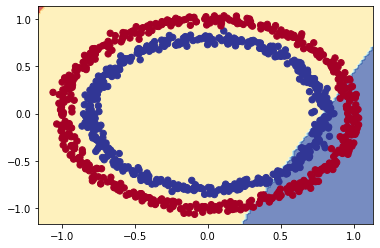

In [211]:
#check the decission boundary for our latest model.

plot_decision_boundary(model_4, X, y)

In [212]:
#build our first neural network with non linearity.(non - linear activation function)

#set random seed.

tf.random.set_seed(42)

In [213]:
#create a model with non linear activation function.

model_5 = tf.keras.Sequential([tf.keras.layers.Dense(1, activation = tf.keras.activations.relu)])

In [214]:
#compile the model.

model_5.compile(loss = ["BinaryCrossentropy"],
                optimizer = tf.keras.optimizers.Adam(lr = 0.001),
                metrics = ["accuracy"])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [215]:
#fit the model

history = model_5.fit(X, y, epochs = 100, verbose = 0)

In [216]:
model_5.evaluate(X , y)

32/32 [==============================] - 0s 1ms/step - loss: 3.2448 - accuracy: 0.4560


[3.2447562217712402, 0.4560000002384186]

doing binary classification


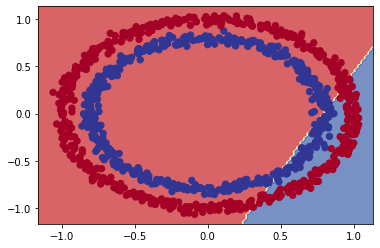

In [217]:
plot_decision_boundary(model_5, X, y)

In [218]:
#upgrading our non linear model with more layers.

#set the random seed.

tf.random.set_seed(42)

#create a model

model_6 = tf.keras.Sequential([tf.keras.layers.Dense(4, activation = "relu"),
                               tf.keras.layers.Dense(4, activation = "relu")])

In [219]:
#compile the model.

model_6.compile(loss= "BinaryCrossentropy",
                optimizer = tf.keras.optimizers.Adam(lr = 0.001),
                metrics = ["accuracy"])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [220]:
#fit the model

history = model_6.fit(X, y, epochs = 100, verbose = 0)

In [221]:
#evaluate the model.

model_6.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6643 - accuracy: 0.3780


[0.6642990708351135, 0.3779999911785126]

doing multiclass classification


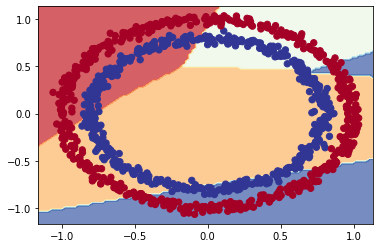

In [222]:
# How do our model predictions look?

plot_decision_boundary(model_6, X, y)

We are missing one thing. The ouput layer with it's activation function. let' add it.

In [223]:
#set the random seed

tf.random.set_seed(42)

#create the model

model_7 = tf.keras.Sequential([tf.keras.layers.Dense(4, activation = 'relu'),
                              tf.keras.layers.Dense(4, activation = 'relu'),
                              tf.keras.layers.Dense(1, activation = 'sigmoid')])

In [224]:
#compile the model.

model_7.compile(loss = ["BinaryCrossentropy"],
                optimizer = tf.keras.optimizers.Adam(lr = 0.001),
                metrics = ["accuracy"])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [225]:
#fit the model

history = model_7.fit(X, y, epochs = 100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 0.6891 - accuracy: 0.5020
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6848 - accuracy: 0.5170
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6824 - accuracy: 0.5160
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6813 - accuracy: 0.5300
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6802 - accuracy: 0.5390
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6794 - accuracy: 0.5380
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6785 - accuracy: 0.5500
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6778 - accuracy: 0.5480
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6772 - accuracy: 0.5530
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6766 - accuracy: 0.5510
Epoch 11/

In [226]:
#evaluate our model.

model_7.evaluate(X, y)

32/32 [==============================] - 0s 3ms/step - loss: 0.2948 - accuracy: 0.9910


[0.2948004901409149, 0.9909999966621399]

doing binary classification


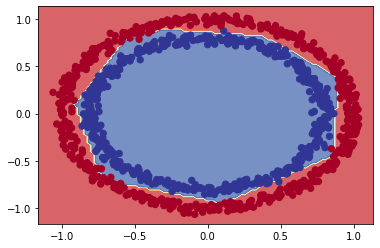

In [227]:
#let's visualize our metrics.

plot_decision_boundary(model_7, X, y)

Note : The combination of linear(straight lines) and non- linear(non-straight lines) function is one of the very fundamentals of neural n/ws.

What's wrong with the prediction we have made ? As we really evaluating our model correctly here? hint: What data did the model learn on and what did we predict on?

-> We should train our model on training data , pre-test our model on validation data and evaluate our model on test data.

To get some institution about the activation function we've  just used, let's create them and try them on some toy data.

In [228]:
#create a toy tensor.

A = tf.cast(tf.range(-10, 10), tf.float32)

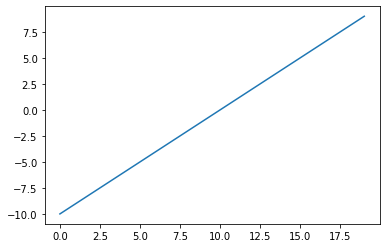

In [229]:
#visualize our data.

plt.plot(A)

In [230]:
#create the sigmoid function and see what it does to our data.
#You can  also find pre-built in sigmoid function at tf.keras.activation.sigmoid

def sigmoid(x):
     return 1/(1 + tf.exp(-x))

sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

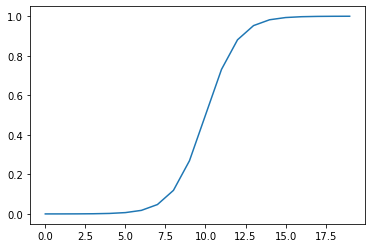

In [231]:
plt.plot(sigmoid(A))

We can see a stright is converted to non straight line using sigmoid function.

Relu - Relu turn all negative to 0 and positive number stays the same.

In [232]:
def relu(x):
    return tf.maximum(0, x)

relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

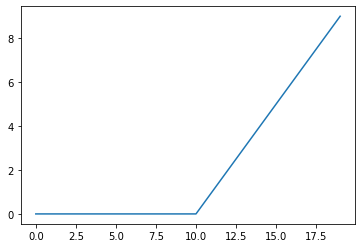

In [233]:
plt.plot(relu(A))

linear - returns input non-modified.

In [234]:
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

In [235]:
A == tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

#Evaluating and improving our classification model

Lets split our circles data data in training and test set. Train a model on training set and evaluate our model on test set.

let's do it.

In [236]:
X.shape, y.shape

((1000, 2), (1000,))

In [237]:
#split our data into train test 

x_train, y_train = X[:800], y[:800]
x_test, y_test = X[800:], y[800:]

In [238]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [239]:
#Building a model

#set random seed.

tf.random.set_seed(42)

In [240]:
#create model same as model_7

model_8 = tf.keras.Sequential([
                               tf.keras.layers.Dense(4, activation = "relu"),
                               tf.keras.layers.Dense(4, activation = "relu"),
                               tf.keras.layers.Dense(1, activation = "sigmoid")])

In [241]:
#compile the model.

model_8.compile(loss = "BinaryCrossentropy",
                optimizer = tf.keras.optimizers.Adam(lr = 0.01),
                metrics = ["accuracy"])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [242]:
#fit the model

history = model_8.fit(x_train, y_train, epochs = 25)

Epoch 1/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6847 - accuracy: 0.5425
Epoch 2/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6777 - accuracy: 0.5525
Epoch 3/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6736 - accuracy: 0.5512
Epoch 4/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6681 - accuracy: 0.5775
Epoch 5/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6633 - accuracy: 0.5850
Epoch 6/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6546 - accuracy: 0.5838
Epoch 7/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6413 - accuracy: 0.6750
Epoch 8/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6264 - accuracy: 0.7013
Epoch 9/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6038 - accuracy: 0.7487
Epoch 10/25
25/25 [==============================] - 0s 2ms/step - loss: 0.5714 - accuracy: 0.7738
Epoch 11/25
25/25 [

In [243]:
#evaluate our model on test set.

loss, accuracy = model_8.evaluate(x_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.1247 - accuracy: 1.0000


In [244]:
print(f"model loss on test set is {loss}")
print(f"model accuracy on the test set {100*accuracy:.2f}%")

model loss on test set is 0.1246885135769844
model accuracy on the test set 100.00%


doing binary classification
doing binary classification


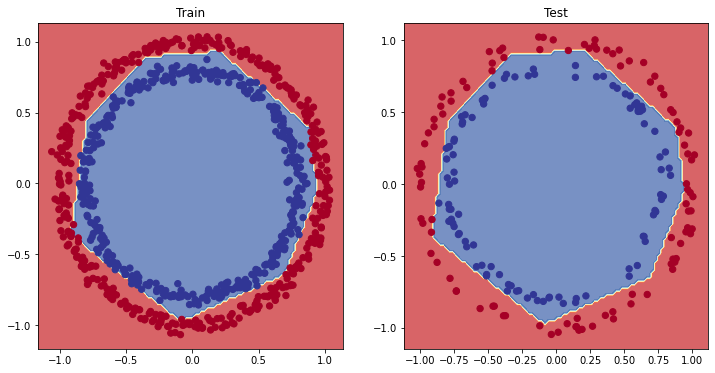

In [245]:
#plot the decission bundary for training and test sets.

plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_8,x_train,y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_8, x_test, y_test)

In [246]:
#plot the loss curve.

pd.DataFrame(history.history)

,loss,accuracy
0,0.684651,0.54250
1,0.677721,0.55250
2,0.673595,0.55125
3,0.668149,0.57750
4,0.663269,0.58500
5,0.654567,0.58375
6,0.641258,0.67500
7,0.626428,0.70125
8,0.603831,0.74875
9,0.571404,0.77375


Text(0.5, 1.0, 'Model_8 training curves')

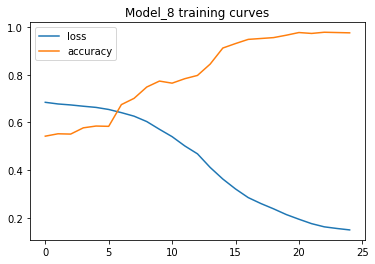

In [247]:
pd.DataFrame(history.history).plot()
plt.title("Model_8 training curves")

We can see that the loss is decreasing and accuraccy is increasing.